In [1]:
#For this project we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
sns.set()
%matplotlib inline

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
df=pd.read_csv('webmd.csv', na_values=' ')

In [3]:
df.head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


In [4]:
df.shape

(362806, 12)

In [5]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered.
df=df.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [6]:
df1=df[~df.Condition.isin(['Pain','Other'])]

In [7]:
df1.shape

(287809, 7)

In [8]:
df1.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,278605,287766,287809,287809.000000,287809.000000,287809.000000,264971
unique,11,1803,5588,NaN,NaN,NaN,2
top,45-54,High Blood Pressure,lisinopril,NaN,NaN,NaN,Female
freq,62074,23275,4158,NaN,NaN,NaN,189224
mean,NaN,NaN,NaN,4.020382,3.550577,3.123565,NaN
std,NaN,NaN,NaN,1.316201,1.451841,1.613679,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [9]:
df1[df1.Satisfaction==6]

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
195073,35-44,Migraine Prevention,"topamax capsule, sprinkle",6,6,6,Female
195282,35-44,Migraine Prevention,topamax,6,6,6,Female


In [10]:
df1=df1.drop([195073,195282])
df1.shape

(287807, 7)

In [11]:
df1.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,278603,287764,287807,287807.000000,287807.000000,287807.000000,264969
unique,11,1803,5588,NaN,NaN,NaN,2
top,45-54,High Blood Pressure,lisinopril,NaN,NaN,NaN,Female
freq,62074,23275,4158,NaN,NaN,NaN,189222
mean,NaN,NaN,NaN,4.020368,3.550560,3.123545,NaN
std,NaN,NaN,NaN,1.316195,1.451832,1.613667,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [12]:
df1.isnull().sum()

Age               9204
Condition           43
Drug                 0
EaseofUse            0
Effectiveness        0
Satisfaction         0
Sex              22838
dtype: int64

In [13]:
df2=df1[df1.Condition.str.contains('Pain', na=False)]
df2

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
184,NaN,Neuropathic Pain,lyrica,5,5,5,NaN
185,NaN,Nerve Pain after Herpes,lyrica,5,5,5,Male
186,65-74,Neuropathic Pain,lyrica,5,5,5,Female
187,19-24,Neuropathic Pain,lyrica,1,3,1,Female
188,35-44,Neuropathic Pain,lyrica,5,5,5,NaN
...,...,...,...,...,...,...,...
359701,25-34,Painful Periods,camrese,4,2,1,Female
361400,35-44,Throat Pain,chloraseptic total,1,1,1,NaN
361535,3-6,Head Pain,children's acetaminophen,5,4,5,Female
361615,13-18,Painful Periods,chateal,5,5,4,Female


In [14]:
df.Condition.value_counts()

Other                                                      49765
Pain                                                       25232
High Blood Pressure                                        23275
Depression                                                 14509
Birth Control                                              12253
                                                           ...  
Infection of the Prostate Gland caused by Klebsiella           1
aggressive systemic mastocytosis                               1
Aluminum Poisoning                                             1
Anemia in Non-Dialysis-Dependent Chronic Kidney Disease        1
Inclusion Body Myositis                                        1
Name: Condition, Length: 1805, dtype: int64

In [15]:
data=df[df['Drug'].isin(['hydrocodone-acetaminophen','lyrica', 'neurontin', 'neurontin capsule','cymbalta,gabapentin solution',
      'cymbalta','savella','oxycodone hcl','oxycodone hcl solution','oxycodone tablet, oral only', 'oxycodone hcl er',
      'gabapentin tablet, extended release 24 hr', 'cymbalta','oxycontin','tramadol hcl','tramadol hcl er','meloxicam',
      'mobic','gabapentin'])]

In [16]:
data.Condition.value_counts()

Pain                                                                                    13071
Neuropathic Pain                                                                         7251
Other                                                                                    4220
Disorder characterized by Stiff, Tender & Painful Muscles                                2628
Major Depressive Disorder                                                                1939
Pain Originating From a Nerve                                                            1936
Chronic Pain                                                                             1662
Joint Damage causing Pain and Loss of Function                                            965
Repeated Episodes of Anxiety                                                              580
Acute Pain Following an Operation                                                         406
Chronic Muscle or Bone Pain                                 

In [17]:
data=data[~data['Condition'].isin(['Other','Severe Pain'])]

In [18]:
data.Condition.value_counts()

Pain                                                                                    13071
Neuropathic Pain                                                                         7251
Disorder characterized by Stiff, Tender & Painful Muscles                                2628
Major Depressive Disorder                                                                1939
Pain Originating From a Nerve                                                            1936
Chronic Pain                                                                             1662
Joint Damage causing Pain and Loss of Function                                            965
Repeated Episodes of Anxiety                                                              580
Acute Pain Following an Operation                                                         406
Chronic Muscle or Bone Pain                                                               405
Chronic Pain with Narcotic Drug Tolerance                   

In [19]:
data=data[data['Condition'].isin(['Neuropathic Pain', 'Pain', 'Disorder characterized by Stiff, Tender & Painful Muscles','Chronic Pain','Pain Originating From a Nerve'])]

In [20]:
data.isnull().sum()

Age               976
Condition           0
Drug                0
EaseofUse           0
Effectiveness       0
Satisfaction        0
Sex              1610
dtype: int64

In [21]:
data.dropna(inplace=True)

In [22]:
data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,24621,24621,24621,24621.000000,24621.000000,24621.000000,24621
unique,11,5,15,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,6978,12081,3504,NaN,NaN,NaN,15757
mean,NaN,NaN,NaN,4.208318,3.548353,3.346290,NaN
std,NaN,NaN,NaN,1.141822,1.345747,1.503307,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


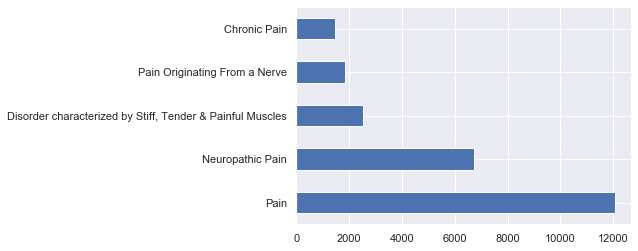

In [23]:
data.Condition.value_counts().plot(kind='barh')

In [24]:
data.Condition.value_counts()

Pain                                                         12081
Neuropathic Pain                                              6726
Disorder characterized by Stiff, Tender & Painful Muscles     2517
Pain Originating From a Nerve                                 1824
Chronic Pain                                                  1473
Name: Condition, dtype: int64

In [25]:
data.Drug.value_counts()

hydrocodone-acetaminophen                    3504
tramadol hcl                                 2491
tramadol hcl er                              2491
lyrica                                       1905
oxycodone hcl solution                       1711
oxycodone hcl er                             1711
oxycodone hcl                                1711
oxycodone tablet, oral only                  1711
neurontin                                    1243
neurontin capsule                            1243
cymbalta                                     1059
oxycontin                                    1024
gabapentin tablet, extended release 24 hr    1016
gabapentin                                   1016
savella                                       785
Name: Drug, dtype: int64

In [26]:
drug=data[data['Drug'].isin(['lyrica','neurontin','cymbalta','gabapentin','tramadol hcl',
                            'hydrocodone-acetaminophen','oxycontin'])] 
drug.Condition.value_counts()

Pain                                                         5153
Neuropathic Pain                                             3614
Disorder characterized by Stiff, Tender & Painful Muscles    1415
Chronic Pain                                                 1148
Pain Originating From a Nerve                                 912
Name: Condition, dtype: int64

In [27]:
c1=drug[drug['Condition']=='Pain'].sample(frac=0.388,replace=True)

In [28]:
c2=drug[drug['Condition']=='Neuropathic Pain'].sample(frac=0.5534,replace=True)

In [29]:
c3=drug[drug['Condition']=='Disorder characterized by Stiff, Tender & Painful Muscles'].sample(frac=1.4134,replace=True)

In [30]:
c4=drug[drug['Condition']=='Chronic Pain'].sample(frac=1.742,replace=True)

In [31]:
c5=drug[drug['Condition']=='Pain Originating From a Nerve'].sample(frac=2.193,replace=True)

In [32]:
df=pd.concat([c1,c2,c3,c4,c5])

In [33]:
df=drug.reset_index(drop=True)

In [34]:
df=df.sample(frac=10,replace=True)

In [35]:
# cond=data[data['Condition']=='Pain'].sample(frac=.165, replace=True)
# cond1=data[data['Condition']=='Neuropathic Pain'].sample(frac=0.297, replace=True)
# cond2=data[data['Condition']=='Disorder characterized by Stiff, Tender & Painful Muscles'].sample(frac=0.794, replace=True)
# cond3=data[data['Condition']=='Chronic Pain'].sample(frac=1.36, replace=True)
# cond4=data[data['Condition']=='Pain Originating From a Nerve'].sample(frac=1.05, replace=True)
# df=pd.concat([cond,cond1,cond2,cond3,cond4])
# df.reset_index(drop=True)

In [42]:
df['Condition']=df['Condition'].replace({'Pain':'Pain','Pain Originating From a Nerve':'Pain Originating From a Nerve',
                                         'Disorder characterized by Stiff, Tender & Painful Muscles': 'Muscles Disorder',
                                        'Neuropathic Pain':'Neuropathic Pain'})

In [43]:
df.Condition.value_counts()

Pain                             51613
Neuropathic Pain                 35979
Muscles Disorder                 14079
Chronic Pain                     11439
Pain Originating From a Nerve     9310
Name: Condition, dtype: int64

In [44]:
#sns.pairplot(df,hue='Sex')

In [45]:
#df.Drug.value_counts().plot(kind='barh')

In [46]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [47]:
# df=df.replace(to_replace=['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
#                                   value=[1,5,10,15,20,30,40,50,60,70,80])

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_svmlight_file
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [49]:
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
#preparing input data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
X=df.drop('Drug', axis=1)
y=df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [51]:
def prepare_inpus(X_train,X_test):
    enc=OrdinalEncoder()
    enc.fit(X_train)
    X_train_enc = enc.transform(X_train)
    X_test_enc = enc.transform(X_test)
    return X_train_enc,X_test_enc

In [52]:
def prepare_targets(y_train,y_test):
    enc=OrdinalEncoder()
    enc.fit(y_train)
    y_train_enc = enc.transform(y_train)
    y_test_enc = enc.transform(y_test)
    return y_train_enc,y_test_enc

In [53]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)


In [54]:
# prepare output dat
y_train  = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [69]:
lab_enc = preprocessing.LabelEncoder()
y_test_ency = lab_enc.fit_transform(y_test_enc)
log_pred_y = lab_enc.fit_transform(y_log_pred)
linSVC_pred_y = lab_enc.fit_transform(y_linSVC_pred)
dtree_pred_y = lab_enc.fit_transform(y_dtree_pred)
rf_pred_y = lab_enc.fit_transform(y_rf_pred)
ex_pred_y = lab_enc.fit_transform(y_ext_pred)
ga_pred_y = lab_enc.fit_transform(y_gas_pred)
kn_pred_y = lab_enc.fit_transform(y_knn_pred)
km_pred_y = lab_enc.fit_transform(y_kms_pred)
gb_pred_y = lab_enc.fit_transform(y_gbc_pred)
xgb_pred_y = lab_enc.fit_transform(y_xgbc_pred)
ba_pred_y = lab_enc.fit_transform(y_bag_pred)
y_testt=lab_enc.fit_transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return roc_auc_score(y_test,y_pred,average=average)

In [70]:
logis=LogisticRegression()
logis.fit(X_train_enc, y_train_enc)
y_log_pred = logis.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=log_pred_y)
print('Logistic Regression Result')
print(sk_report)
print('roc_auc_score of Logistic regression is: '+str(multiclass_roc_auc_score(y_test_ency, log_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Result
              precision    recall  f1-score   support

           0      0.132     0.006     0.012      2651
           1      0.087     0.573     0.151      2520
           2      0.000     0.000     0.000      8770
           3      0.045     0.026     0.033      4737
           4      0.179     0.335     0.233      3158
           5      0.000     0.000     0.000      2568
           6      0.000     0.000     0.000      6201

    accuracy                          0.086     30605
   macro avg      0.063     0.134     0.061     30605
weighted avg      0.044     0.086     0.043     30605

roc_auc_score of Logistic regression is: 0.49139091563637033


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_enc, y_train_enc)
y_dtree_pred = dtree.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=dtree_pred_y)
print('Decision Tree Result')
print(sk_report)
print('roc_auc_score of Decision Tree is: '+str(multiclass_roc_auc_score(y_test_ency, dtree_pred_y)))

Decision Tree Result
              precision    recall  f1-score   support

           0      0.460     0.399     0.427      2651
           1      0.633     0.481     0.546      2520
           2      0.753     0.920     0.828      8770
           3      0.499     0.748     0.598      4737
           4      0.595     0.515     0.552      3158
           5      0.824     0.798     0.811      2568
           6      0.669     0.362     0.470      6201

    accuracy                          0.647     30605
   macro avg      0.633     0.603     0.605     30605
weighted avg      0.651     0.647     0.632     30605

roc_auc_score of Decision Tree is: 0.7708713956716223


In [72]:
rf = RandomForestClassifier()
rf.fit(X_train_enc, y_train_enc)
y_rf_pred = rf.predict(X_test_enc);
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=rf_pred_y)
print('Random Forest Result')
print(sk_report)
print('roc_auc_score of Random Forest is: '+str(multiclass_roc_auc_score(y_test_ency, rf_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Result
              precision    recall  f1-score   support

           0      0.456     0.398     0.425      2651
           1      0.645     0.473     0.546      2520
           2      0.752     0.919     0.828      8770
           3      0.496     0.739     0.593      4737
           4      0.595     0.515     0.552      3158
           5      0.829     0.792     0.810      2568
           6      0.656     0.368     0.471      6201

    accuracy                          0.645     30605
   macro avg      0.633     0.601     0.604     30605
weighted avg      0.649     0.645     0.631     30605

roc_auc_score of Random Forest is: 0.7694318941850715


In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train_enc, y_train_enc)
y_knn_pred = knn.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=kn_pred_y)
print('KNeighborsClassifier Result')
print(sk_report)
print('roc_auc_score of KNeighborsClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, kn_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier Result
              precision    recall  f1-score   support

           0      0.370     0.455     0.408      2651
           1      0.559     0.519     0.538      2520
           2      0.748     0.886     0.811      8770
           3      0.517     0.601     0.556      4737
           4      0.551     0.484     0.515      3158
           5      0.799     0.793     0.796      2568
           6      0.593     0.361     0.449      6201

    accuracy                          0.619     30605
   macro avg      0.591     0.586     0.582     30605
weighted avg      0.616     0.619     0.609     30605

roc_auc_score of KNeighborsClassifier is: 0.7600328708690613


In [75]:
gas = GaussianNB()
gas.fit(X_train_enc, y_train_enc)
y_gas_pred = gas.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ga_pred_y)
print('GuasianNB Result')
print(sk_report)
print('roc_auc_score of GuasianNB is: '+str(multiclass_roc_auc_score(y_test_ency, ga_pred_y)))

GuasianNB Result
              precision    recall  f1-score   support

           0      0.293     0.095     0.143      2651
           1      0.532     0.128     0.206      2520
           2      0.680     1.000     0.810      8770
           3      0.382     0.704     0.495      4737
           4      0.526     0.189     0.278      3158
           5      0.683     0.743     0.712      2568
           6      0.121     0.070     0.089      6201

    accuracy                          0.510     30605
   macro avg      0.459     0.418     0.390     30605
weighted avg      0.459     0.510     0.444     30605

roc_auc_score of GuasianNB is: 0.6655923803119956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
kms = KMeans()
kms.fit(X_train_enc, y_train_enc)
y_kms_pred = kms.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=km_pred_y)
print('KMeans Result')
print(sk_report)
print('roc_auc_score of KMeans is: '+str(multiclass_roc_auc_score(y_test_ency, km_pred_y)))

KMeans Result
              precision    recall  f1-score   support

           0      0.120     0.190     0.148      2651
           1      0.082     0.171     0.111      2520
           2      0.000     0.000     0.000      8770
           3      0.082     0.047     0.060      4737
           4      0.107     0.085     0.095      3158
           5      0.031     0.102     0.047      2568
           6      0.180     0.073     0.104      6201
           7      0.000     0.000     0.000         0

    accuracy                          0.070     30605
   macro avg      0.075     0.084     0.071     30605
weighted avg      0.080     0.070     0.066     30605

roc_auc_score of KMeans is: 0.47628810974895147


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [77]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_enc, y_train_enc)
y_gbc_pred = gbc.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=gb_pred_y)
print('GradientBoostingClassifier Result')
print(sk_report)
print('roc_auc_score of GradientBoostingClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, gb_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier Result
              precision    recall  f1-score   support

           0      0.399     0.070     0.119      2651
           1      0.545     0.272     0.363      2520
           2      0.715     0.940     0.812      8770
           3      0.383     0.937     0.544      4737
           4      0.618     0.281     0.386      3158
           5      0.770     0.776     0.773      2568
           6      0.605     0.172     0.267      6201

    accuracy                          0.572     30605
   macro avg      0.576     0.493     0.466     30605
weighted avg      0.595     0.572     0.516     30605

roc_auc_score of GradientBoostingClassifier is: 0.7086797322654618


In [78]:
xgbc = XGBClassifier()
xgbc.fit(X_train_enc, y_train_enc)
y_xgbc_pred = xgbc.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=xgb_pred_y)
print('XGBClassifier Result')
print(sk_report)
print('roc_auc_score of XGBClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, xgb_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier Result
              precision    recall  f1-score   support

           0      0.437     0.252     0.320      2651
           1      0.656     0.423     0.514      2520
           2      0.740     0.936     0.826      8770
           3      0.449     0.844     0.586      4737
           4      0.606     0.458     0.522      3158
           5      0.813     0.795     0.804      2568
           6      0.694     0.285     0.404      6201

    accuracy                          0.627     30605
   macro avg      0.628     0.570     0.568     30605
weighted avg      0.645     0.627     0.601     30605

roc_auc_score of XGBClassifier is: 0.752649759221972


In [79]:
ext = ExtraTreesClassifier()
ext.fit(X_train_enc, y_train_enc)
y_ext_pred = ext.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ex_pred_y)
print('ExtracTreeClassifier Result')
print(sk_report)
print('roc_auc_score of ExtracTreeClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, ex_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtracTreeClassifier Result
              precision    recall  f1-score   support

           0      0.460     0.399     0.427      2651
           1      0.633     0.481     0.546      2520
           2      0.753     0.920     0.828      8770
           3      0.499     0.748     0.598      4737
           4      0.595     0.515     0.552      3158
           5      0.824     0.798     0.811      2568
           6      0.669     0.362     0.470      6201

    accuracy                          0.647     30605
   macro avg      0.633     0.603     0.605     30605
weighted avg      0.651     0.647     0.632     30605

roc_auc_score of ExtracTreeClassifier is: 0.7708713956716223


In [80]:
bag =  BaggingClassifier()
bag.fit(X_train_enc, y_train_enc)
y_bag_pred = bag.predict(X_test_enc)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ba_pred_y)
print('BaggingClassifier Result')
print(sk_report)
print('roc_auc_score of BaggingClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, ba_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier Result
              precision    recall  f1-score   support

           0      0.460     0.398     0.426      2651
           1      0.623     0.480     0.542      2520
           2      0.753     0.921     0.828      8770
           3      0.501     0.743     0.598      4737
           4      0.596     0.510     0.550      3158
           5      0.828     0.795     0.811      2568
           6      0.664     0.369     0.474      6201

    accuracy                          0.647     30605
   macro avg      0.632     0.602     0.604     30605
weighted avg      0.650     0.647     0.632     30605

roc_auc_score of BaggingClassifier is: 0.7703699916859613


In [81]:
linSVC=LinearSVC()
linSVC.fit(X_train_enc, y_train_enc)
y_linSVC_pred=linSVC.predict(X_test_enc);
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=linSVC_pred_y)
print('LinearSVC Result')
print(sk_report)
print('roc_auc_score of LinearSVC is: '+str(multiclass_roc_auc_score(y_test_ency, linSVC_pred_y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC Result
              precision    recall  f1-score   support

           0      0.235     0.006     0.012      2651
           1      0.088     0.651     0.155      2520
           2      0.000     0.000     0.000      8770
           3      0.099     0.071     0.083      4737
           4      0.177     0.191     0.184      3158
           5      0.000     0.000     0.000      2568
           6      0.000     0.000     0.000      6201

    accuracy                          0.085     30605
   macro avg      0.086     0.131     0.062     30605
weighted avg      0.061     0.085     0.046     30605

roc_auc_score of LinearSVC is: 0.48984704071957674


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
dict={'ModelName':['LogisticRegression','LinearSVC','DecisionTree',
                   'RandomForest','ExtracTreeClassifier','KNeighborsClassifier','KMeans',
                   'GradientBoostingClassifier','XGBClassifier','BaggingClassifier','GuasianNB'],
      'Result':[0.05,0.09,0.65,0.64,0.65,0.61,0.142,0.58,0.63,0.65,0.51]}

In [83]:
Accuracy =pd.DataFrame.from_dict(dict)
Accuracy

,ModelName,Result
0,LogisticRegression,0.050
1,LinearSVC,0.090
2,DecisionTree,0.650
3,RandomForest,0.640
4,ExtracTreeClassifier,0.650
5,KNeighborsClassifier,0.610
6,KMeans,0.142
7,GradientBoostingClassifier,0.580
8,XGBClassifier,0.630
9,BaggingClassifier,0.650


In [84]:
Accuracy['Result'].max()
Accuracy[Accuracy['Result']==0.65]

,ModelName,Result
2,DecisionTree,0.65
4,ExtracTreeClassifier,0.65
9,BaggingClassifier,0.65


In [86]:
print('MAE of Logistric Regression:', metrics.mean_absolute_error(y_test_ency,log_pred_y))
print('MSE of Logistric Regression:', metrics.mean_squared_error(y_test_ency,log_pred_y))
print('RMSE of Logistric Regression:', np.sqrt(metrics.mean_squared_error(y_test_ency,log_pred_y)))
print("______________________________________________")
print('MAE of LinearSVC:', metrics.mean_absolute_error(y_test_ency,linSVC_pred_y))
print('MSE of LinearSVC:', metrics.mean_squared_error(y_test_ency,linSVC_pred_y))
print('RMSE of LinearSVC:', np.sqrt(metrics.mean_squared_error(y_test_ency,linSVC_pred_y)))
print("______________________________________________")
print('MAE of Decision Tree:', metrics.mean_absolute_error(y_test_ency,dtree_pred_y))
print('MSE of Decision Tree:', metrics.mean_squared_error(y_test_ency,dtree_pred_y))
print('RMSE of Decision Tree:', np.sqrt(metrics.mean_squared_error(y_test_ency,dtree_pred_y)))
print("______________________________________________")
print('MAE of Random Forest:', metrics.mean_absolute_error(y_test_ency,rf_pred_y))
print('MSE of Random Forest:', metrics.mean_squared_error(y_test_ency,rf_pred_y))
print('RMSE of Random Forest:', np.sqrt(metrics.mean_squared_error(y_test_ency,rf_pred_y)))
print("______________________________________________")
print('MAE of GuasianNB:', metrics.mean_absolute_error(y_test_ency,ga_pred_y))
print('MSE of GuasianNB:', metrics.mean_squared_error(y_test_ency,ga_pred_y))
print('RMSE of GuasianNB:', np.sqrt(metrics.mean_squared_error(y_test_ency,ga_pred_y)))
print("______________________________________________")
print('MAE of KNeighborsClassifier:', metrics.mean_absolute_error(y_test_ency,kn_pred_y))
print('MSE of KNeighborsClassifier:', metrics.mean_squared_error(y_test_ency,kn_pred_y))
print('RMSE of KNeighborsClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,kn_pred_y)))
print("______________________________________________")
print('MAE of KMeans:', metrics.mean_absolute_error(y_test_ency,km_pred_y))
print('MSE of KMeans:', metrics.mean_squared_error(y_test_ency,km_pred_y))
print('RMSE of KMeans:', np.sqrt(metrics.mean_squared_error(y_test_ency,km_pred_y)))
print("______________________________________________")
print('MAE of GradientBoostingClassifier:', metrics.mean_absolute_error(y_test_ency,gb_pred_y))
print('MSE of GradientBoostingClassifier:', metrics.mean_squared_error(y_test_ency,gb_pred_y))
print('RMSE of GradientBoostingClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,gb_pred_y)))
print("______________________________________________")
print('MAE of XGBClassifier:', metrics.mean_absolute_error(y_test_ency,xgb_pred_y))
print('MSE of XGBClassifier:', metrics.mean_squared_error(y_test_ency,xgb_pred_y))
print('RMSE of XGBClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,xgb_pred_y)))
print("______________________________________________")
print('MAE of ExtracTreeClassifier:', metrics.mean_absolute_error(y_test_ency,ex_pred_y))
print('MSE of ExtracTreeClassifier:', metrics.mean_squared_error(y_test_ency,ex_pred_y))
print('RMSE of ExtracTreeClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,ex_pred_y)))
print("______________________________________________")
print('MAE of BaggingClassifier:', metrics.mean_absolute_error(y_test_ency,ba_pred_y))
print('MSE of BaggingClassifier:', metrics.mean_squared_error(y_test_ency,ba_pred_y))
print('RMSE of BaggingClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,ba_pred_y)))
print("______________________________________________")

MAE of Logistric Regression: 2.0307792844306487
MSE of Logistric Regression: 6.426335566083973
RMSE of Logistric Regression: 2.5350218078123063
______________________________________________
MAE of LinearSVC: 2.059107988890704
MSE of LinearSVC: 6.589609540924686
RMSE of LinearSVC: 2.5670234788417274
______________________________________________
MAE of Decision Tree: 1.0476719490279367
MSE of Decision Tree: 3.6370527691553667
RMSE of Decision Tree: 1.907105862073568
______________________________________________
MAE of Random Forest: 1.0533899689593205
MSE of Random Forest: 3.656036595327561
RMSE of Random Forest: 1.9120765139835698
______________________________________________
MAE of GuasianNB: 1.4762947230844634
MSE of GuasianNB: 5.226923705276915
RMSE of GuasianNB: 2.2862466413921565
______________________________________________
MAE of KNeighborsClassifier: 1.1618036268583565
MSE of KNeighborsClassifier: 4.15471328214344
RMSE of KNeighborsClassifier: 2.0383113800750463
___________

In [104]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_ency, logis.predict_proba(X_test_enc)[:,1],pos_label=2)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_ency, rf.predict_proba(X_test_enc)[:,1],pos_label=2)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test_ency, dtree.predict_proba(X_test_enc)[:,1],pos_label=2)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test_ency, knn.predict_proba(X_test_enc)[:,1],pos_label=2)
gas_fpr, gas_tpr, gas_thresholds = roc_curve(y_test_ency, gas.predict_proba(X_test_enc)[:,1],pos_label=2)
#kms_fpr, kms_tpr, kms_thresholds = roc_curve(y_test_ency, kms.predict_proba(X_test_enc)[:,1],pos_label=2)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test_ency, gbc.predict_proba(X_test_enc)[:,1],pos_label=2)
ext_fpr, ext_tpr, ext_thresholds = roc_curve(y_test_ency, ext.predict_proba(X_test_enc)[:,1],pos_label=2)
#linSVC_fpr, linSVC_tpr, linSVC_thresholds = roc_curve(y_test_ency, linSVC.predict_proba(X_test_enc)[:,1],pos_label=2)
bag_fpr, bag_tpr, bag_thresholds = roc_curve(y_test_ency, bag.predict_proba(X_test_enc)[:,1],pos_label=2)
xgbc_fpr, xgbc_tpr, xgbc_thresholds = roc_curve(y_test_ency, xgbc.predict_proba(X_test_enc)[:,1],pos_label=2)

plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Logistic Regression ROC
logit_roc_auc = multiclass_roc_auc_score(y_test_ency, log_pred_y)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
rf_roc_auc = multiclass_roc_auc_score(y_test_ency, rf_pred_y)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
dtree_roc_auc = multiclass_roc_auc_score(y_test_ency, dtree_pred_y)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)

# Plot XBoosts ROC
xgb_roc_auc = multiclass_roc_auc_score(y_test_ency, xgb_pred_y)
plt.plot(xgbc_fpr, xgbc_tpr, label='XBoosts (area = %0.2f)' % xgb_roc_auc)

# Plot ExtracTree ROC
ex_roc_auc = multiclass_roc_auc_score(y_test_ency, ex_pred_y)
plt.plot(ext_fpr, ext_tpr, label='ExtracTree (area = %0.2f)' % ex_roc_auc)

# Plot GradientBoosting ROC
gbc_roc_auc = multiclass_roc_auc_score(y_test_ency, gb_pred_y)
plt.plot(gbc, gbc_tpr, label='GradientBoosting (area = %0.2f)' % gbc_roc_auc)

# Plot Bagging ROC
bag_roc_auc = multiclass_roc_auc_score(y_test_ency, bag_pred_y)
plt.plot(bag_fpr, bag_tpr, label='Bagging (area = %0.2f)' % bag_roc_auc)

# Plot GuasianNB ROC
gas_roc_auc = multiclass_roc_auc_score(y_test_ency, ga_pred_y)
plt.plot(bag_fpr, bag_tpr, label='GuasianNB (area = %0.2f)' % gas_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

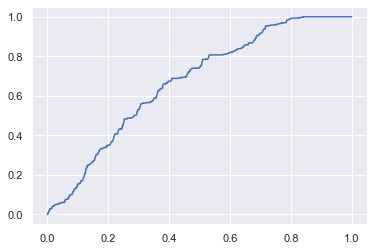

In [100]:
logit_roc_auc = multiclass_roc_auc_score(y_test_ency, log_pred_y)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)